<a href="https://colab.research.google.com/github/YasuharuSuzuki/23_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Section 16 
# Section 16-4 住宅価格予測(教科書P.404)

## サンプルプログラム1　住宅価格予測を行う

In [21]:
from sklearn.datasets import fetch_california_housing # scikit-learnのdatasetsライブラリのカリフォルニア住宅価格データ
from sklearn import linear_model # scikit-learnのlinear_modelライブラリ
import numpy as np # 数値演算ライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ
from pandas import DataFrame # データ分析ライブラリ
import random # ランダム処理ライブラリ

In [7]:
# データセットを読み込む(DataFrame形式で読み込む)
housing = fetch_california_housing(as_frame=True)    # カリフォルニア市の住宅価格と関連データ(教科書に記載のあるボストンデータセットは現在非推奨)

housing.frame['Price'] = housing.target

# DataFrame形式で表示
housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


### 各列データの内容について

| 英 | 日（直訳） |
| - | - |
| MedInc | ブロックの所得中央値 |
| HouseAge | ブロックの家屋年齢の中央値 |
| AveRooms | 1世帯あたりの平均部屋数 |
| AveBedrms | 1世帯あたりの平均寝室数 |
| Population | ブロックの人口 |
| AveOccup | 世帯人数の平均値 |
| Latitude | 緯度 |
| Longitude | 経度 |
| Price | 住宅価格(目的変数) |

In [16]:
len(housing.frame)

20640

- かなり件数が多いので、1000件に絞って学習します

In [39]:
# 訓練データを作る
#rooms_train = DataFrame(housing.frame["AveRooms"])    # 部屋数のデータを抜き出す(全部使用する場合)
#y_train = housing.target    # ターゲット（住宅価格）
rooms_train = DataFrame(housing.frame.loc[0:999, "AveRooms"])    # 部屋数のデータを抜き出す(1000件のみ使用する場合)
y_train = housing.target[0:1000]    # ターゲット（住宅価格）。1000件のみ使用する

In [40]:
# LinearRegressionで学習させる
model = linear_model.LinearRegression()    # 回帰モデルを作る
model.fit(rooms_train, y_train)    # 訓練する

LinearRegression()

In [46]:
# 部屋数の回帰直線を引くためのテストデータを作る
rooms_test = DataFrame(np.arange(rooms_train.values.min(), rooms_train.values.max(), 0.1))
prices_test = model.predict(rooms_test)    # モデルを使って住宅価格を予想する

/Users/suzuki_yasuharu/mambaforge/envs/base23/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


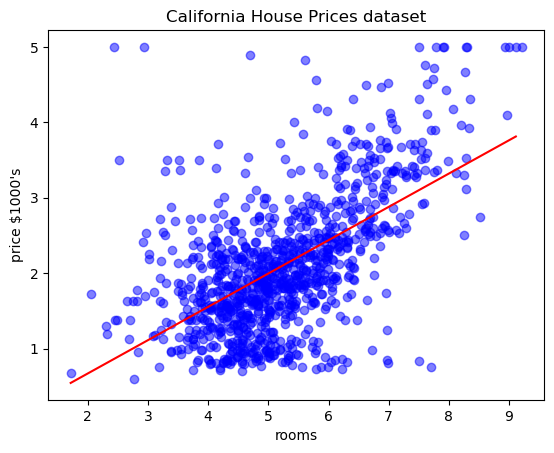

In [47]:
# グラフ表示する（部屋数と住宅価格）
plt.scatter(rooms_train.values.ravel(), y_train, c= "b", alpha = 0.5)    # 訓練データ
plt.plot(rooms_test.values.ravel(), prices_test, c = "r")    # 回帰直線
plt.title("California House Prices dataset")
plt.xlabel("rooms")    # x軸のラベル
plt.ylabel("price $1000's")    # y軸のラベル
# plt.xlim(0, 10) # Xの上限を定める
plt.show()

In [49]:
# 回帰モデルの性能評価として、エラーレートを算出する
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = model.predict(rooms_train)    # モデルを使って住宅価格を予想する
rooms_test2 = DataFrame(housing.frame.loc[1000:1499, "AveRooms"])    # 部屋数のデータを抜き出す(500件のみ使用する場合)
prices_test2 = housing.target[1000:1500]    # ターゲット（住宅価格）。500件のみ使用する
prices_test2_pred = model.predict(rooms_test2)

# 学習時スコア
train_MAE = mean_absolute_error(y_train, y_train_pred)
train_MSE = mean_squared_error(y_train, y_train_pred)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_R2 = r2_score(y_train, y_train_pred)

# テスト時スコア
test_MAE = mean_absolute_error(prices_test2, prices_test2_pred)
test_MSE = mean_squared_error(prices_test2, prices_test2_pred)
test_RMSE = np.sqrt(mean_squared_error(prices_test2, prices_test2_pred))
test_R2 = r2_score(prices_test2, prices_test2_pred)

print("学習時スコア(train score)")
print("　平均絶対誤差: ", train_MAE)
print("　平均二乗誤差: ", train_MSE)
print("　二乗平均平方根誤差: ", train_RMSE)
print("　決定係数R^2: ", train_R2)

print("テストスコア(test score)")
print("　平均絶対誤差: ", test_MAE)
print("　平均二乗誤差: ", test_MSE)
print("　二乗平均平方根誤差: ", test_RMSE)
print("　決定係数R^2: ", test_R2)

学習時スコア(train score)
　平均絶対誤差:  0.5418126331075832
　平均二乗誤差:  0.5244502834897189
　二乗平均平方根誤差:  0.7241893975264474
　決定係数R^2:  0.33779939958946636
テストスコア(test score)
　平均絶対誤差:  1.0957267084463633
　平均二乗誤差:  3.5378811431322847
　二乗平均平方根誤差:  1.8809256080803103
　決定係数R^2:  -9.037388659126528


---
---
---
---
---

## 練習プログラム1　住宅価格予測を行う(8.0点)
- 他の回帰モデルを使用して住宅価格予測を行いましょう
  - 例：RandomForestRegressor、Support Vector Regressionなど
  - ネットを検索してsklearnのモデルを新たに１つ作って学習させてみましょう
- trainデータとtestデータを分割して予測してみましょう
  - データを自分で分割して、学習、予測をさせてみましょう
  - 各エラーレートも出してみましょう
- LinearRegressionモデルと比較して、考察を書いてみましょう
  - エラーレートが小さくなった場合は、なぜ小さくなったのか、考察してみましょう
  - モデルを２つ以上作成したり、パラメータを変更して改善してみても良いです。（RandomForestRegressorは特にパラメータでかなり精度が変わるはずです）

RandomForestRegressor()

/Users/suzuki_yasuharu/mambaforge/envs/base23/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


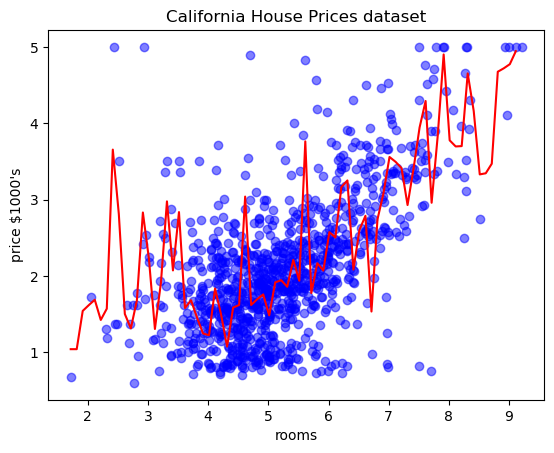

学習時スコア(train score)
　平均絶対誤差:  0.23017183404285724
　平均二乗誤差:  0.09397551365705464
　二乗平均平方根誤差:  0.3065542589119496
　決定係数R^2:  0.8813411994870056
テストスコア(test score)
　平均絶対誤差:  0.9825306180190474
　平均二乗誤差:  1.546848831130168
　二乗平均平方根誤差:  1.2437237760572755
　決定係数R^2:  -3.3885937053336814


### 考察
- できるだけたくさん書いてみましょう

---
---
---
---
---